# Examples using piecewise linear with decay

## Initial Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [3]:
import dlpy.maths as dlm
import dlpy.percentile as dlpr

# Examples

In [4]:
# Define a piecewise function between (0, 0), (1,1), and (2, 5)
xpts = [0, 1, 2]
ypts = [0, 1, 5]
pts = list(zip(xpts, ypts))
fx = lambda x: dlm.pw_linear(x, pts, -1, 10)

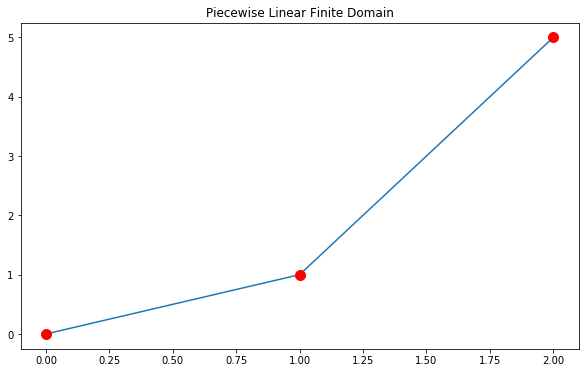

In [5]:
xs = [i/100 for i in range(1, 200)]
ys = [fx(x) for x in xs]
plt.plot(xs,ys)
plt.plot(xpts, ypts, 'ro', markersize=10)
plt.title("Piecewise Linear Finite Domain")
plt.show()

# Examples for paper

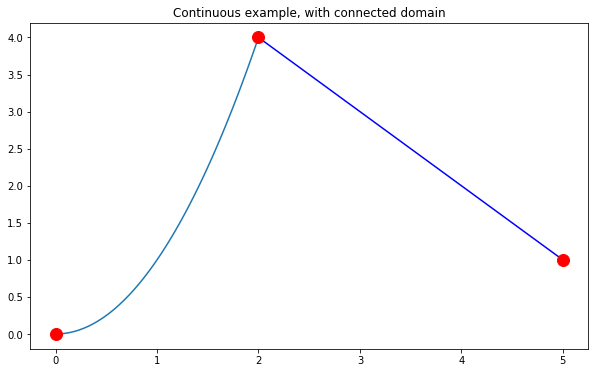

In [6]:
xs=[i/50 for i in range(100)]
plt.plot(xs, [x**2 for x in xs])
x2s=[2+i/100 for i in range(300)]
plt.plot(x2s, [-x+6 for x in x2s], color="blue")
plt.plot([0, 2,5], [0, 4,1], 'ro', markersize=12)
plt.title("Continuous example, with connected domain")
plt.show()

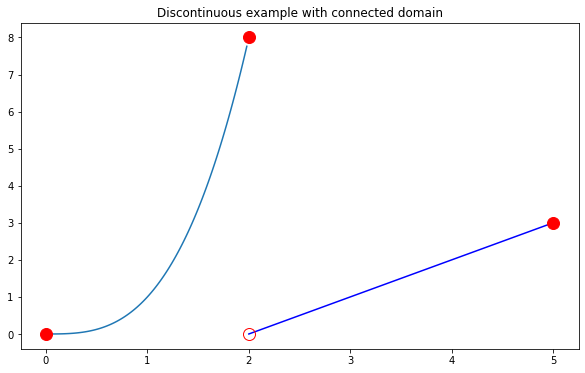

In [7]:
xs=[i/50 for i in range(100)]
plt.plot(xs, [x**3 for x in xs])
x2s=[2+i/100 for i in range(300)]
plt.plot(x2s, [x-2 for x in x2s], color="blue")
plt.plot([0, 2,5], [0, 8,3], 'ro', fillstyle="full", markersize=12)
plt.plot([2], [0], 'ro', fillstyle="none", markersize=12)
plt.title("Discontinuous example with connected domain")
plt.show()

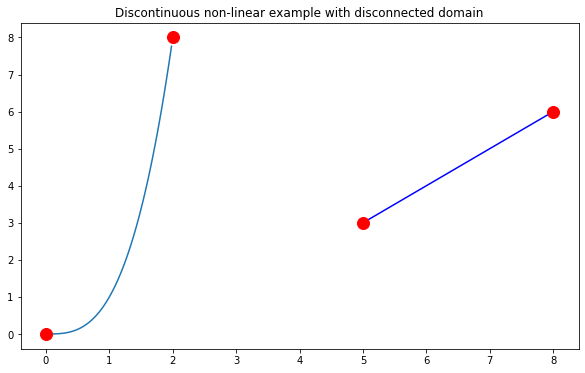

In [8]:
xs=[i/50 for i in range(100)]
plt.plot(xs, [x**3 for x in xs])
x2s=[5+i/100 for i in range(300)]
plt.plot(x2s, [x-2 for x in x2s], color="blue")
plt.plot([0,2,5,8], [0,8,3,6], 'ro', fillstyle="full", markersize=12)
plt.title("Discontinuous non-linear example with disconnected domain")
plt.show()

## Functions with decay

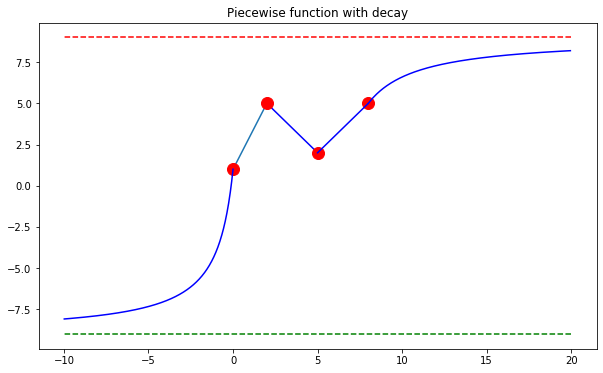

In [9]:
xs=[i/50 for i in range(100)]
plt.plot(xs, [2*x+1 for x in xs])
x2s=[2+i/100 for i in range(300)]
plt.plot(x2s, [-x+7 for x in x2s], color="blue")
plt.plot([0, 2,5,8], [1, 5,2,5], 'ro', markersize=12)
x3s=[x+3 for x in x2s]
plt.plot(x3s, [x-3 for x in x3s], color="blue")
plt.title("Piecewise function with decay")
xs=[-i/50 for i in range(500)]
plt.plot(xs, [-10/(x-1)-9 for x in xs], color="blue")
plt.plot([20, -10], [-9, -9], "g--")
rhsx=[8+i/20 for i in range(240)]
plt.plot([20, -10], [9,9], "r--")
plt.plot(rhsx, [-12/(x-5)+9 for x in rhsx], color="blue")
plt.show()

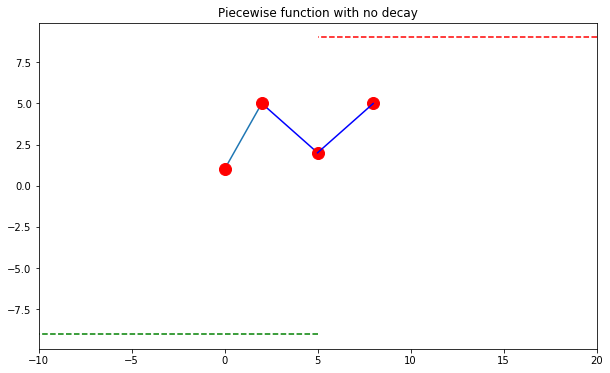

In [10]:
xs=[i/50 for i in range(100)]
plt.plot(xs, [2*x+1 for x in xs])
x2s=[2+i/100 for i in range(300)]
plt.plot(x2s, [-x+7 for x in x2s], color="blue")
plt.plot([0, 2,5,8], [1, 5,2,5], 'ro', markersize=12)
x3s=[x+3 for x in x2s]
plt.plot(x3s, [x-3 for x in x3s], color="blue")
plt.title("Piecewise function with no decay")
#xs=[-i/50 for i in range(500)]
#plt.plot(xs, [-10/(x-1)-9 for x in xs], color="blue")
plt.plot([5, -10], [-9, -9], "g--")
#rhsx=[8+i/20 for i in range(240)]
plt.plot([20, 5], [9,9], "r--")
#plt.plot(rhsx, [-12/(x-5)+9 for x in rhsx], color="blue")
plt.xlim(-10,20)
plt.show()

# Examples for paper

## Power decay example k=1

In [11]:
X = [50, 30, 20, 10, 40, 20, 50, 10]
ss = [i*5 for i in range(12)]
percs = [dlpr.gcp(X, s) for s in ss]
tbl=pd.DataFrame({'gcp':percs})
tbl.index=ss
print(tbl.to_latex())

\begin{tabular}{lr}
\toprule
{} &       gcp \\
\midrule
0  &  0.000400 \\
5  &  0.000769 \\
10 &  0.010000 \\
15 &  0.130000 \\
20 &  0.250000 \\
25 &  0.375000 \\
30 &  0.500000 \\
35 &  0.625000 \\
40 &  0.750000 \\
45 &  0.870000 \\
50 &  0.990000 \\
55 &  0.999231 \\
\bottomrule
\end{tabular}



In [12]:
# Let's see the parameters for the decays
pts, LHS, RHS = dlpr.gcp(X,0, return_params=True)
tbl=pd.DataFrame({'x':[a[0] for a in pts], 'y':[a[1] for a in pts]})
print(tbl.to_latex())

\begin{tabular}{lrr}
\toprule
{} &   x &     y \\
\midrule
0 &  10 &  0.01 \\
1 &  20 &  0.25 \\
2 &  30 &  0.50 \\
3 &  40 &  0.75 \\
4 &  50 &  0.99 \\
\bottomrule
\end{tabular}



In [13]:
tbl = pd.DataFrame({'A':[LHS[0], RHS[0]], 'B':[LHS[1], RHS[1]], 'C':[LHS[2], RHS[2]]})
tbl.index = ["LHS", "RHS"]
print(tbl.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &         A &          B &  C \\
\midrule
LHS & -0.004167 &  10.416667 &  0 \\
RHS & -0.004167 &  49.583333 &  1 \\
\bottomrule
\end{tabular}



## Exponential decay example
This is the same as the previous example, except we use exponential decay

In [14]:
X = [50, 30, 20, 10, 40, 20, 50, 10]
ss = [i*5 for i in range(1,12)]
percs = [dlpr.gcp(X, s, decay_type=dlpr.DecayType.EXPONENTIAL) for s in ss]
tbl=pd.DataFrame({'gcp':percs})
tbl.index=ss
print(tbl.to_latex())

\begin{tabular}{lr}
\toprule
{} &           gcp \\
\midrule
5  &  6.144212e-08 \\
10 &  1.000000e-02 \\
15 &  1.300000e-01 \\
20 &  2.500000e-01 \\
25 &  3.750000e-01 \\
30 &  5.000000e-01 \\
35 &  6.250000e-01 \\
40 &  7.500000e-01 \\
45 &  8.700000e-01 \\
50 &  9.900000e-01 \\
55 &  9.999999e-01 \\
\bottomrule
\end{tabular}



In [15]:
# Let's see the parameters for the decays
pts, LHS, RHS = dlpr.gcp(X,0, decay_type=dlpr.DecayType.EXPONENTIAL, return_params=True)
tbl=pd.DataFrame({'x':[a[0] for a in pts], 'y':[a[1] for a in pts]})
print(tbl.to_latex())

\begin{tabular}{lrr}
\toprule
{} &   x &     y \\
\midrule
0 &  10 &  0.01 \\
1 &  20 &  0.25 \\
2 &  30 &  0.50 \\
3 &  40 &  0.75 \\
4 &  50 &  0.99 \\
\bottomrule
\end{tabular}



In [16]:
tbl = pd.DataFrame({'A':[LHS[0], RHS[0]], 'B':[LHS[1], RHS[1]], 'C':[LHS[2], RHS[2]]})
tbl.index = ["LHS", "RHS"]
print(tbl.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &             A &    B &  C \\
\midrule
LHS &  3.775135e-13 &  2.4 &  0 \\
RHS & -1.304181e+50 & -2.4 &  1 \\
\bottomrule
\end{tabular}



## Calculating the approximation function

In [17]:
X = [10, 15, 17, 20, 25, 35, 37, 39, 40, 50]
epsilon=0.05
pts = dlpr.gcp_approx_pts(X, epsilon)
tbl=pd.DataFrame({'Percentile':[a[1] for a in pts], 'Value giving percentile':[a[0] for a in pts]})
print(tbl.to_latex(index=False))

\begin{tabular}{rr}
\toprule
 Percentile &  Value giving percentile \\
\midrule
       0.05 &                     10.0 \\
       0.20 &                     16.6 \\
       0.40 &                     23.0 \\
       0.50 &                     30.0 \\
       0.60 &                     35.8 \\
       0.80 &                     39.2 \\
       0.95 &                     50.0 \\
\bottomrule
\end{tabular}



In [18]:
approx = lambda x: dlm.pw_linear(x, pts, 0, 1)
origin = lambda x: dlpr.gcp(X, x)
xs = [5+i/10 for i in range(550)]
approxs = [approx(x) for x in xs]
origins = [origin(x) for x in xs]
diff = [x - y for (x,y) in zip(approxs, origins)]

In [19]:
pd.DataFrame({"x":xs, "origs":origins, "approx":approxs, "diff":diff})

,x,origs,approx,diff
0,5.0,0.000900,0.015278,0.014378
1,5.1,0.000917,0.015493,0.014576
2,5.2,0.000934,0.015714,0.014780
3,5.3,0.000952,0.015942,0.014990
4,5.4,0.000971,0.016176,0.015206
...,...,...,...,...
545,59.5,0.999057,0.986260,-0.012798
546,59.6,0.999066,0.986364,-0.012702
547,59.7,0.999075,0.986466,-0.012609
548,59.8,0.999083,0.986567,-0.012516


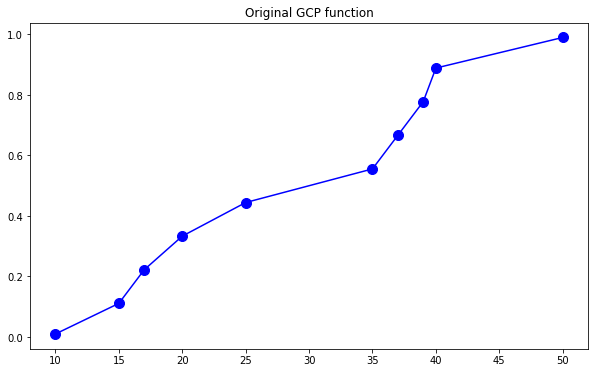

In [20]:
plt.plot(X, [origin(x) for x in X], "bo-", markersize=10, label="Original GCP")
plt.title("Original GCP function")
plt.show()

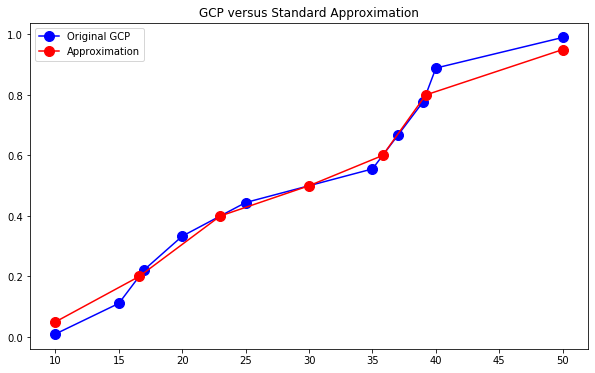

In [21]:
plt.plot(X, [origin(x) for x in X], "bo-", markersize=10, label="Original GCP")
plt.plot([p[0] for p in pts], [p[1] for p in pts], "ro-", markersize=10, label="Approximation")
plt.title("GCP versus Standard Approximation")
plt.legend()
plt.show()

# Example for inverse in the epsilon region

In [22]:
X=[10,20,30,40,50]
epsilon=0.01
pts, LHS,RHS = dlpr.gcp(X, 0, epsilon, return_params=True)

In [23]:
LHS

(-0.0041666666666666605, 10.416666666666666, 0)

In [24]:
pts

[(10, 0.01), (20, 0.25), (30, 0.5), (40, 0.75), (50, 0.99)]

In [25]:
10+10/24

10.416666666666666

In [26]:
10+10/24-(1/240)/(0.005)

9.583333333333332

In [27]:
dlpr.gcp_inverse(X,0.005,epsilon)

9.583333333333334

In [28]:
np.exp(-24)*0.01

3.775134544279098e-13

In [29]:
np.log(0.005/(np.exp(-24)*0.01))/2.4

9.71118867476669

In [30]:
dlpr.gcp_inverse(X,0.005,epsilon, decay_type=dlpr.DecayType.EXPONENTIAL)

9.71118867476669

In [31]:
dlpr.gcp(X,0, epsilon, decay_type=dlpr.DecayType.EXPONENTIAL, return_params=True)

([(10, 0.01), (20, 0.25), (30, 0.5), (40, 0.75), (50, 0.99)],
 (3.775134544279098e-13, 2.4, 0),
 (-1.3041808783935038e+50, -2.399999999999998, 1))

# Handling a single point

* What do we do when we have a single point (x,y) with decay on either side?
* We need a slope as well in that case
* To work out better with the infrastructure we have (we do not specify a slope in th pw_linear() function)
* We simply set the decay slope to be 1 for both sides.

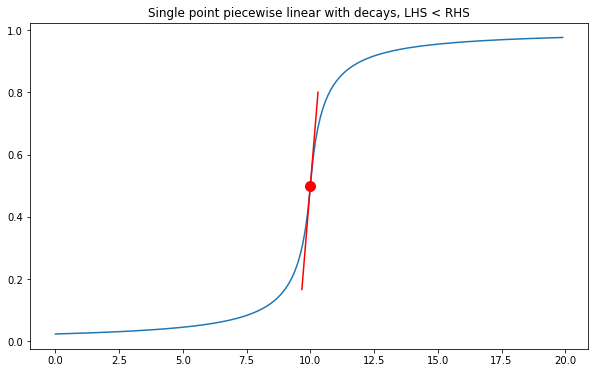

In [42]:
single_x=10
single_fx = lambda x: dlpr.pw_linear(x, [[single_x, 0.5]], 0, 1)
xs = [single_x + i/10 for i in range(-100,100)]
ys = [single_fx(x+0.0000000000001) for x in xs]
txs = [single_x + i/30 for i in range(-10,10)]
tys = [0.5+(x-single_x) for x in txs]
plt.plot(xs,ys)
plt.plot([single_x], [0.5], "ro", markersize=10)
plt.title("Single point piecewise linear with decays, LHS < RHS")
plt.plot(txs, tys, "r-")
plt.show()

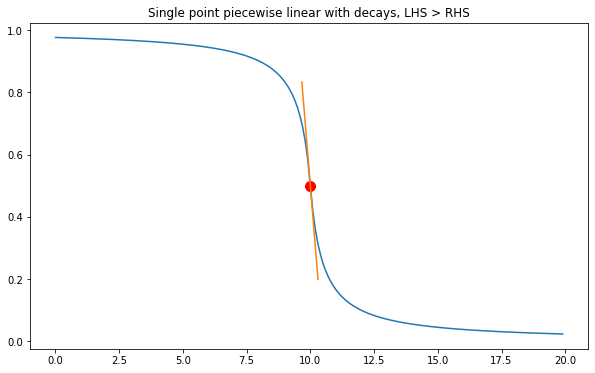

In [45]:
single_x=10
single_fx = lambda x: dlpr.pw_linear(x, [[single_x, 0.5]], 1, 0)
xs = [single_x + i/10 for i in range(-100,100)]
ys = [single_fx(x+0.0000000000001) for x in xs]
plt.plot(xs,ys)
plt.plot([single_x], [0.5], "ro", markersize=10)
txs = [single_x + i/30 for i in range(-10,10)]
tys = [0.5-(x-single_x) for x in txs]
plt.plot(txs,tys)
plt.title("Single point piecewise linear with decays, LHS > RHS")
plt.show()